# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

###Not for Grading


####Regression using MLP with MSE Loss

The objective of this case study is to understand regression i.e., to predict the price of the house using Multilayer perceptron with Cross Entropy Loss.  The package used here is  [PyTorch](https://pytorch.org/). 

##*We will see more on PyTorch in the upcoming sessions.*

#### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P18_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "912345678" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="M1W2_CS_6_MLP_Regression" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages 

In [0]:
# Importing required Packages
import matplotlib.pyplot as plt
import numpy as np
import  torch
from torch import nn
from sklearn.preprocessing import StandardScaler

###The attributes of related House price are stored in "X" as features and the prices of the houses are stored in "y" as labels

In [0]:
X = np.array([[3, 2000, 90], [2, 800, 143], [2, 850, 167], [1, 550, 267], [4, 2000, 396]])
y =  np.array([23.0, 8, 9.0, 9.0 , 25.0])

###Standard scaling the features "X"

In [0]:

ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)
X

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.58834841,  1.20863526, -1.13296108],
       [-0.39223227, -0.6997362 , -0.64318182],
       [-0.39223227, -0.62022073, -0.42139498],
       [-1.37281295, -1.09731359,  0.50271682],
       [ 1.56892908,  1.20863526,  1.69482106]])

###Defining the model for Linear Regression with MLP using PyTorch's nn.Module

In [0]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(LinearRegressionModel, self).__init__() 
        # Calling Super Class's constructor
        self.linear1 = nn.Linear(input_dim, 4)
        self.sigmoid = nn.Sigmoid()
        self.linear2 = nn.Linear(4, output_dim)
        # nn.Linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function
        #print(x.size())
        out = self.sigmoid(self.linear1(x))
        out = self.linear2(out)
        return out

input_dim = 3
output_dim = 1

###The LinearRegressionModel() is saved in model below

In [0]:
model = LinearRegressionModel(input_dim,output_dim)
criterion = nn.MSELoss()# Mean Squared Loss
l_rate = 0.01 #Learning Rate
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) #Stochastic Gradient Descent

epochs = 500 #number of epochs

###Storing the losses in a list for the prescribed epochs

In [0]:
losses = []
for epoch in range(epochs):
#increase the number of epochs by 1 every time
    epoch +=1
    inputs = torch.from_numpy(X.astype(np.float32))
    labels = torch.from_numpy(y.astype(np.float32))
    #clear grads as discussed in prev post
    optimiser.zero_grad()
    #forward to get predicted values
    outputs = model.forward(inputs)
    #print('outputs: ', outputs.size())
    #print('labels: ', labels.size())
    loss = criterion(outputs, labels.unsqueeze(1))
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.item()))
    losses.append(loss.item())
    if (epoch-1)%5 == 0:
        for i in model.parameters():
            print(i)

epoch 1, loss 276.5071105957031
Parameter containing:
tensor([[ 0.2604, -0.4120,  0.2004],
        [-0.5753,  0.4235, -0.0850],
        [ 0.2543,  0.3148,  0.5325],
        [ 0.3425,  0.3019,  0.3521]], requires_grad=True)
Parameter containing:
tensor([ 0.1600, -0.1275, -0.0971,  0.0216], requires_grad=True)
Parameter containing:
tensor([[ 0.2998,  0.1493,  0.2448, -0.2111]], requires_grad=True)
Parameter containing:
tensor([0.3744], requires_grad=True)
epoch 2, loss 258.28173828125
epoch 3, loss 241.39697265625
epoch 4, loss 225.57737731933594
epoch 5, loss 210.61685180664062
epoch 6, loss 196.36634826660156
Parameter containing:
tensor([[ 0.3492, -0.3122,  0.2252],
        [-0.5145,  0.4916, -0.0674],
        [ 0.3019,  0.3826,  0.5150],
        [ 0.3529,  0.3157,  0.3502]], requires_grad=True)
Parameter containing:
tensor([ 0.3401, -0.0048,  0.0429,  0.0464], requires_grad=True)
Parameter containing:
tensor([[1.0106, 0.7562, 0.9821, 0.5520]], requires_grad=True)
Parameter containing

###Plotting the Loss vs Epochs graph

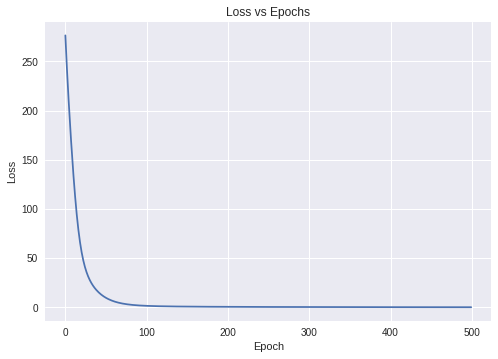

In [0]:
#Plotting Loss vs Epochs
fig,ax = plt.subplots(1)
plt.title('Loss vs Epochs')
ax.plot(losses)
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
plt.savefig('Loss_vs_Epoch.png')

### Please answer the questions below to complete the experiment:




In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test'\"" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 21356
Date of submission:  24 Mar 2019
Time of submission:  11:25:59
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
